# Autoencoder

대표적인 unsupervised learning의 한가지

In [119]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.ndimage import imread

In [120]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist/', one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


나만의 이미지 가져와서 테스트하기 : cat.png (128 x 128 = 16,384)

In [121]:
#mnist = np.vectorize(lambda x: 255 - x)(np.ndarray.flatten(scipy.ndimage.imread("./image/cat.png", flatten=True)))

In [122]:
#mnist.shape

### 옵션 설정

In [123]:
# Model

# 28*28 --> 256 --> 28*28의 구조를 가지는 네트워크
num_input = 28*28 # 입력 개수 == 출력 개수이기 때문에 num_output은 따로 정의하지 않는다.
#num_input = mnist.shape[0] # 나만의 이미지로 테스트하기 (고양이 이미지))

num_hidden = 256 # hidden 갯수를 적게 하는 게 일반적
#num_hidden = 28*28 # hidden 갯수를 동일하게 하면 어떻게 될까 테스트 용도
#num_hidden = 4 # hidden 갯수를 아주 작게 하면 어떻게 될까 테스트 용도

# Learning

learning_rate = 0.01
training_epoch = 10
batch_size = 100

# Evaluation

num_output_sample = 10

### 신경망 모델 만들기

Autoencoder에서는 label이 없습니다. 그러므로 입력값으로 x_true만 주면 됩니다.

In [124]:
x_true = tf.placeholder(tf.float32, [None, num_input])

다만 loss function의 기준으로 삼기 위해 y_true를 x_true와 동일하게 설정해 줍니다. 

In [125]:
y_true = x_true

Encoder의 가중치와 바이어스를 정의해 줍니다.

In [126]:
weight_encoder = tf.Variable(tf.truncated_normal([num_input, num_hidden]))
bias_encoder = tf.Variable(tf.truncated_normal([num_hidden]))

Decoder의 가중치와 바이어스를 정의해 줍니다. 

In [127]:
weight_decoder = tf.Variable(tf.truncated_normal([num_hidden, num_input]))
bias_decoder = tf.Variable(tf.truncated_normal([num_input]))

In [128]:
encoder = tf.nn.sigmoid(tf.add(tf.matmul(x_true, weight_encoder), bias_encoder))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, weight_decoder), bias_decoder))

In [129]:
cost = tf.reduce_mean(tf.square(y_true - decoder))
optimizer = tf.train.RMSPropOptimizer(learning_rate)
optimizer = optimizer.minimize(cost)

### 모델 학습시키기

In [130]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [131]:
total_batch = mnist.train.num_examples/batch_size # 550

In [132]:
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_value = sess.run([optimizer, cost], {x_true:batch_xs})
        total_cost += cost_value
    print "Epoch : {0}, Cost : {1}".format(epoch+1, total_cost/total_batch)
print "Optimization completed."

Epoch : 1, Cost : 0.187549529218
Epoch : 2, Cost : 0.048038557138
Epoch : 3, Cost : 0.0383752119135
Epoch : 4, Cost : 0.0324750394306
Epoch : 5, Cost : 0.0309198906036
Epoch : 6, Cost : 0.0298012265123
Epoch : 7, Cost : 0.0281463147361
Epoch : 8, Cost : 0.0267567007921
Epoch : 9, Cost : 0.0260494063117
Epoch : 10, Cost : 0.0244968455116
Optimization completed.


### 평가하기

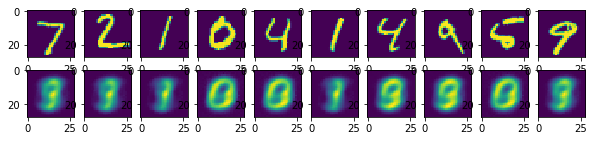

In [133]:
## samples = sess.run(decoder, {x_true: mnist.test.images[:num_output_sample]})
fig, ax = plt.subplots(2, num_output_sample, figsize=(num_output_sample,2))
for i in range(num_output_sample):
    ax[0][i].set_axis_off
    ax[1][i].set_axis_off
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
plt.show()